# ２つの変数の記述統計
ここでは２つの変数の関係について学ぶ

## ２つの変数の関係
２つの変数の関係とは？例えば、国語、英語、数学の３教科のテストを受験した100人のデータをみたところ、「国語の点数が高い人ほど英語の点数が高い」といった傾向があったとする。このような量的変数どうしの関係を<b>相関</b>という。<br>
質的変数どうしは<b>連関</b>という。（ex: 和食派は甘党が多い）

## 散布図
ここではch1.ipynbでも利用したteaching_method.csvを使って説明する。対象とする変数はpsycology_testとstats_test1である。これら２つとも量的変数である。２変数（xとyとする）の関係は以下のパターンがある。 <br>
1. 変数xが大きいほど、変数yも大きい傾向にある（<b>正の相関</b>）
2. 変数xが大きいほど、変数yは小さい傾向にある（<b>負の相関</b>）
3. 変数xが大小と変数yの大小に関係はない（<b>無相関</b>）

stats_test1とstats_test2は正の相関があるので、実際に図示して確認してみよう。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../data/teaching_method.csv')
data.head()

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
0,1,大村,男,嫌い,好き,13,6,10,C
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
3,4,多村,男,好き,好き,12,10,15,A
4,5,松中,男,嫌い,嫌い,10,5,8,B


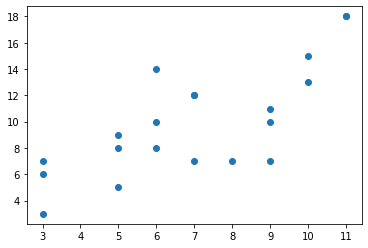

In [3]:
plt.scatter(x=data.stats_test1, y=data.stats_test2) # matplotlibで描画

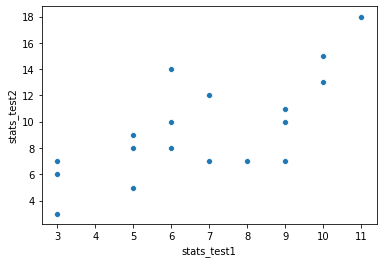

In [4]:
sns.scatterplot(x='stats_test1', y='stats_test2', data=data) # seabornで描画

stats_test1の得点が高いほどstats_test2の得点が高い傾向にあるように思える。ではstats_test1とpsycology_testはどうだろうか？

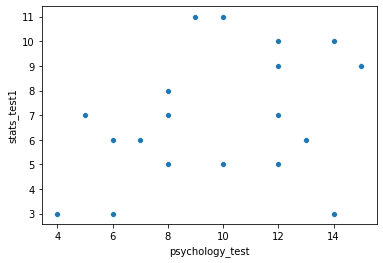

In [5]:
sns.scatterplot(x='psychology_test', y='stats_test1', data=data)

やや右上がりのようにも見えるが先ほどよりかは相関が弱いと言える。ではstats_test2と比較するとどうだろうか？

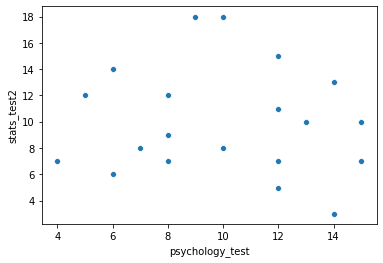

In [6]:
sns.scatterplot(x='psychology_test', y='stats_test2', data=data)

全体的に散らばっており、ほぼ無相関と言える。

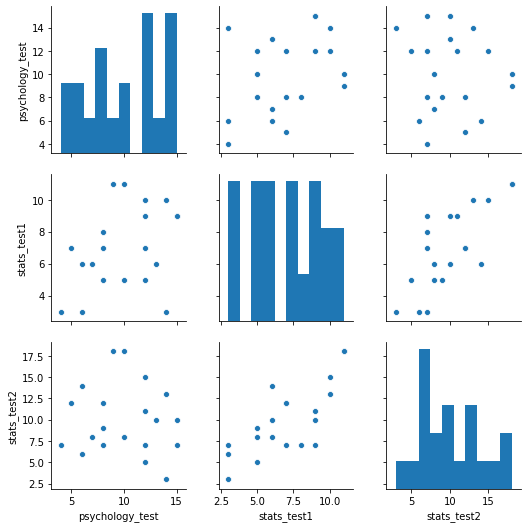

In [7]:
# seabornというライブラリはpairplotという全ての要素の散布図を出す方法もある
sns.pairplot(data.drop(['id'], axis=1))

## 共分散
散布図は２変数間の相関の様子を視覚的に把握することに有効だが、変数がたくさんある場合に各変数の相関を見るために散布図を書いていたら大変である。そこで相関を図ではなく数値として表現することが一般的である。この場合の指標を<b>相関係数</b>と呼ぶ。相関係数の前に共分散を説明する。共分散も相関係数と同じく２変数間の関係の強さを表す指標である。まずは<b>stats_test1とstats_test2の共分散を求めて、その値を使って相関係数を計算する</b>。<br>
<b>共分散</b>とは偏差(実測値 - 平均)の積の平均である。xとyの２変数を用いて表現する。
$$
S_{xy}(共分散) = \frac{(x_1 - \overline{x})(y_1 - \overline{y}) + (x_2 - \overline{x})(y_2 - \overline{y}) +....+(x_n - \overline{x})(y_n - \overline{y}) }{n} \\
$$
例えばxとyというのはstats_test1とstats_test2それぞれの点数となる。$\overline{x}$はxの平均を表している。nはデータの個数を表している。<br><br>
$$ 
x = [1, 2, 3]\\
y = [2, 4, 6]\\
\overline{x} = \frac{1+2+3}{3} = 2 \\
\overline{y} = \frac{1+2+3}{3} = 4 \\
S_{xy} = \frac{(1-2)(2-4)+(2-2)(4-4)+(3-2)(6-4)}{3} = \frac{4}{3}
$$

In [8]:
data.cov() # 共分散の関数cov() 厳密には不偏共分散を求めている(nをn-1にしたもの)

,id,psychology_test,stats_test1,stats_test2
id,35.000000,-0.421053,2.263158,-2.421053
psychology_test,-0.421053,11.684211,3.368421,-1.315789
stats_test1,2.263158,3.368421,6.631579,7.947368
stats_test2,-2.421053,-1.315789,7.947368,16.947368


ここで計算された共分散は２変数の関係の強さを反映している指標だが、その大きさが測定単位に依存してしまうという問題がある。
例えば身長のデータセットを[m]と[cm]とした場合に体重[kg]との共分散の値が大きく異なってします。
データが全く同じ意味であっても1.5mの50kgと150cmの50kgとでは共分散の値の大きさに100倍の違いが出てしまい、単位によって強さの指標の値が変わってしまうのは問題である。そこで標準偏差を利用することで測定単位の影響を受けない相関、すなわち相関係数を求めることができる。

## 相関係数
<b>相関係数</b>は式で書くと以下のようになる。
$$
r_{xy} = \frac{S_{xy}}{S_xS_y}
$$
$r_{xy}$が相関係数で、右辺の分子が共分散、分母の$S_x$と$S_y$はそれぞれ$x$の標準偏差、$y$の標準偏差である。このように共分散を２変数の標準偏差の積で割り算することで測定単位の影響を受けなくなる。

In [10]:
data.corr() # 相関係数を求める関数corr()

,id,psychology_test,stats_test1,stats_test2
id,1.000000,-0.020821,0.148550,-0.099407
psychology_test,-0.020821,1.000000,0.382665,-0.093505
stats_test1,0.148550,0.382665,1.000000,0.749659
stats_test2,-0.099407,-0.093505,0.749659,1.000000


無相関の場合は０に近いので、psychology_testとstats_test2は-0.093505でほぼ０のため無相関と言える。正の相関がある場合は１に近づく（散布図が右肩上がり）。負の相関がある場合は−１に近くなる（散布図が右肩下がり）。<br>
では<b>相関係数がどのような値の場合に「強い相関」「弱い相関」となるのか？</b>これには明確な基準はないが参考値として下記を参考にして欲しい。

|相関係数&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|大きさの評価|
|:-------------|:---|
|$-0.2\le r \le 0.2$|ほとんど相関なし|
|$-0.4\le r < -0.2$ or $0.2 < r \le 0.4$|弱い相関あり|
|$-0.7\le r < -0.4$ or $0.4 < r \le 0.7$|中程度の相関あり|
|$-1.0\le r < -0.7$ or $0.7 < r \le 1.0$|強い相関あり|

<b>散布図を確認せず相関係数だけを確認する</b>のはお勧めできない。なぜかというと外れ値などは相関係数の値を眺めてもわからないからだ。相関係数はこのような外れ値による影響を大きく受けるので、散布図と合わせて見る事が重要である。